<a href="https://colab.research.google.com/github/indmind/2141720003-pcvk-2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


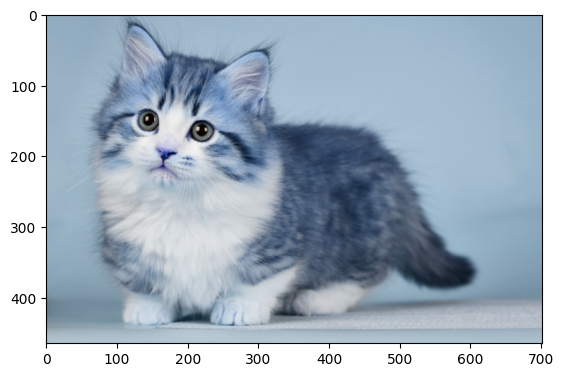

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/kitten.jpeg')
plt.imshow(img)

masukkan brightness: 50


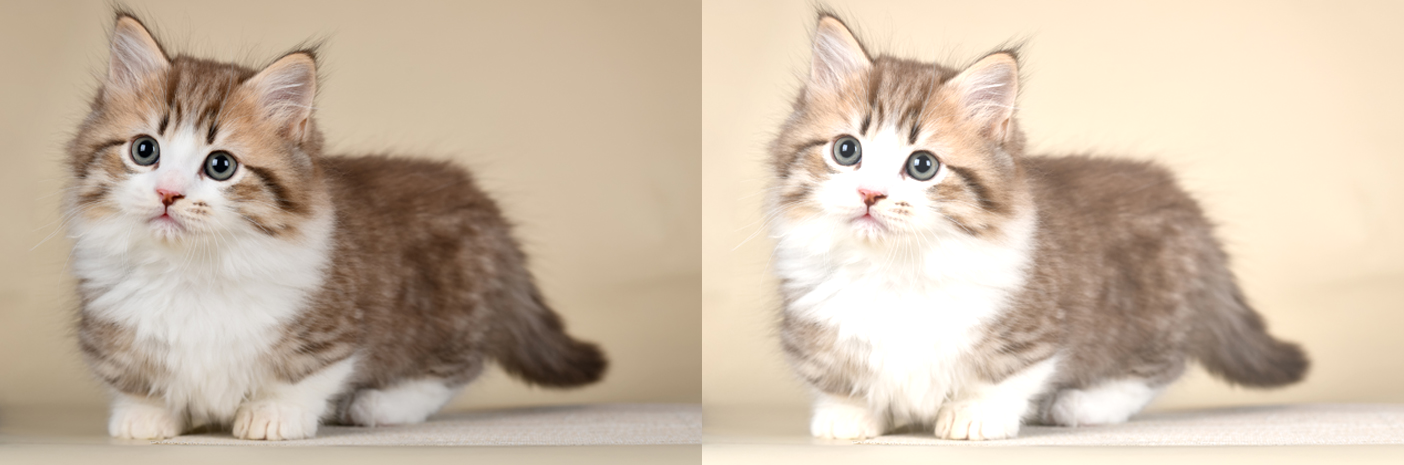

In [18]:
try:
  brightness = int(input("masukkan brightness: "))
except ValueError:
  print("error not number")

# brightness
imgb = np.zeros(img.shape, img.dtype)

# g(x, y) = f(x, y) + b
for y in range(imgb.shape[0]):
  for x in range(imgb.shape[1]):
    for c in range(imgb.shape[2]):
      imgb[y,x,c] = np.clip(img[y,x,c] + brightness,0,255)

cv2_imshow(cv.hconcat((img, imgb)))

# Tugas

## 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

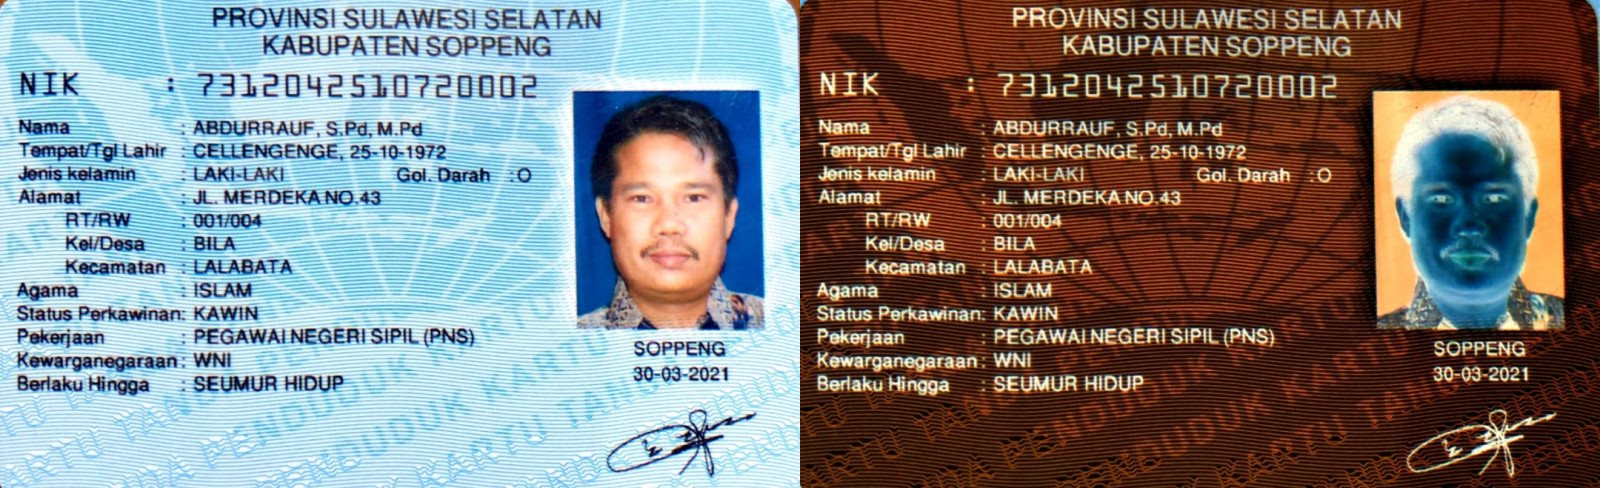

In [29]:
ktp = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg')
ktp_inversed = np.clip(np.add(255, -ktp), 0, 255)

cv2_imshow(cv.hconcat((ktp, ktp_inversed)))

## 2. Kontras dan tingkat kecerahan

masukkan kecerahan [-255 - 255]: 10
masukkan kontras [1.0 - 3.0]: 1.5


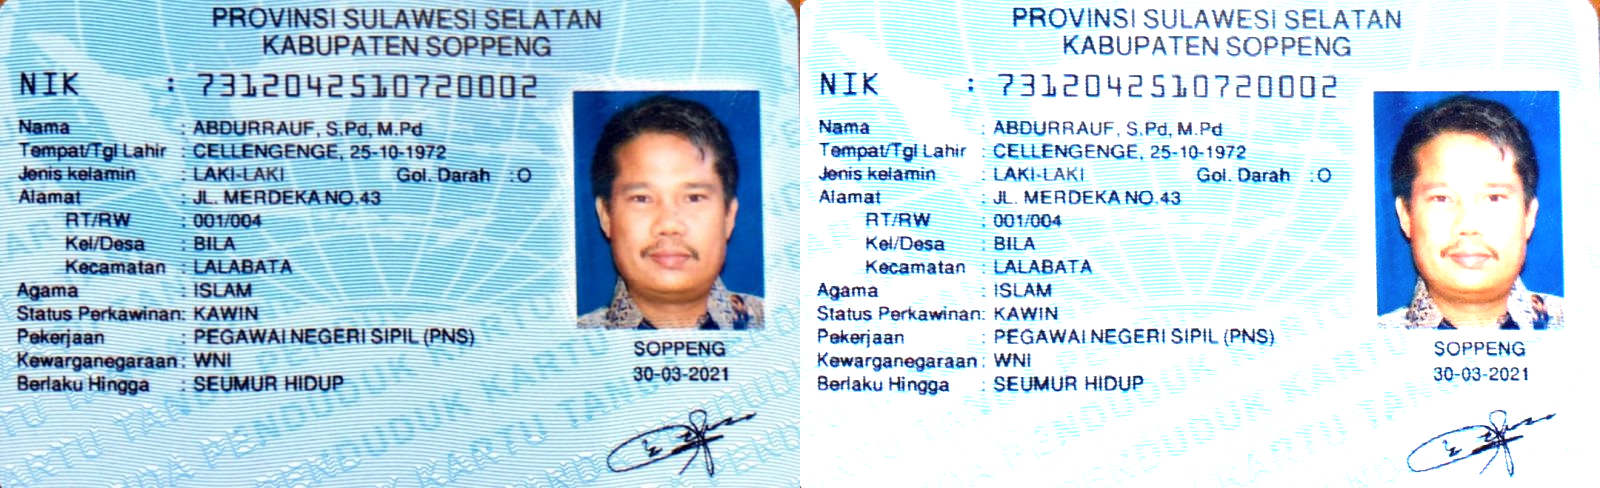

In [32]:
img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg')

try:
  brightness = int(input("masukkan kecerahan [-255 - 255]: "))
  kontras = float(input("masukkan kontras [1.0 - 3.0]: "))
except ValueError:
  print("error not number")

# brightness
imgb = np.zeros(img.shape, img.dtype)

# g(x, y) = a ∗ f(x, y) + b
for y in range(imgb.shape[0]):
  for x in range(imgb.shape[1]):
    for c in range(imgb.shape[2]):
      imgb[y,x,c] = np.clip(kontras * img[y,x,c] + brightness,0,255)

cv2_imshow(cv.hconcat((img, imgb)))

## 3. Logarithmic brightness

masukkan kecerahan: 50


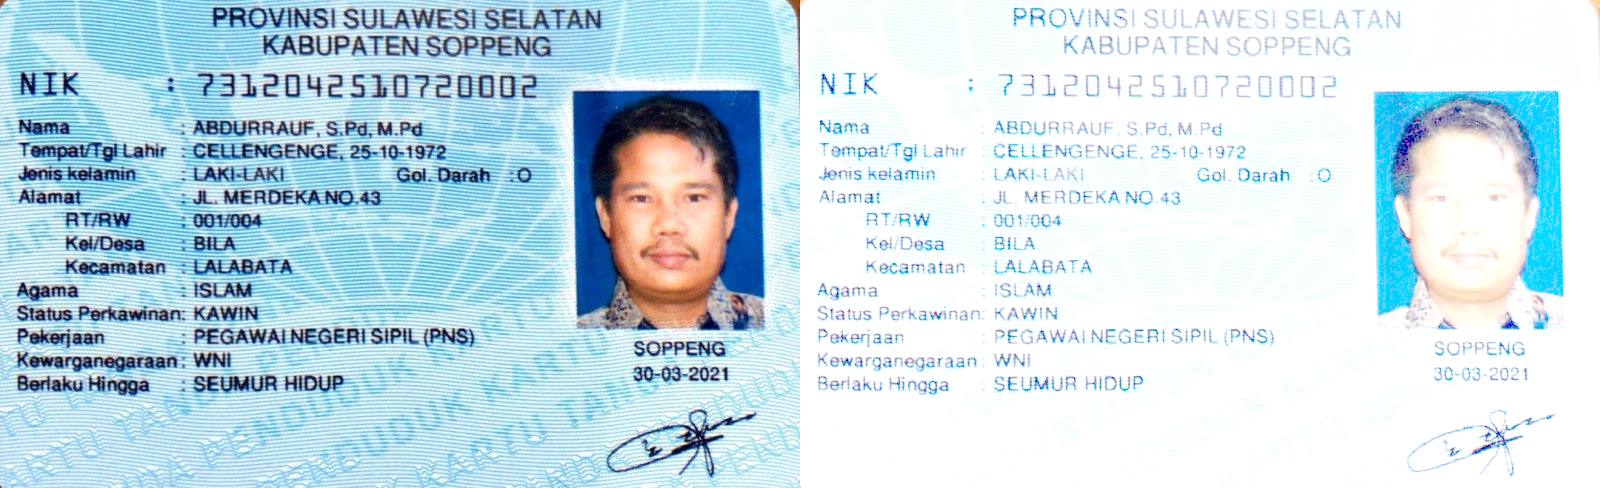

In [34]:
img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg')

try:
  brightness = int(input("masukkan kecerahan: "))
except ValueError:
  print("error not number")

imgb = np.zeros(img.shape, img.dtype)

# s = c ∗ log(1 + r)
for y in range(imgb.shape[0]):
  for x in range(imgb.shape[1]):
    for c in range(imgb.shape[2]):
      imgb[y, x, c] = np.clip( brightness * np.log(1 + img[y, x, c]), 0, 255)

cv2_imshow(cv.hconcat((img, imgb)))

## 4. transformasi grayscale menggunakan metode averaging, lightness, dan luminance

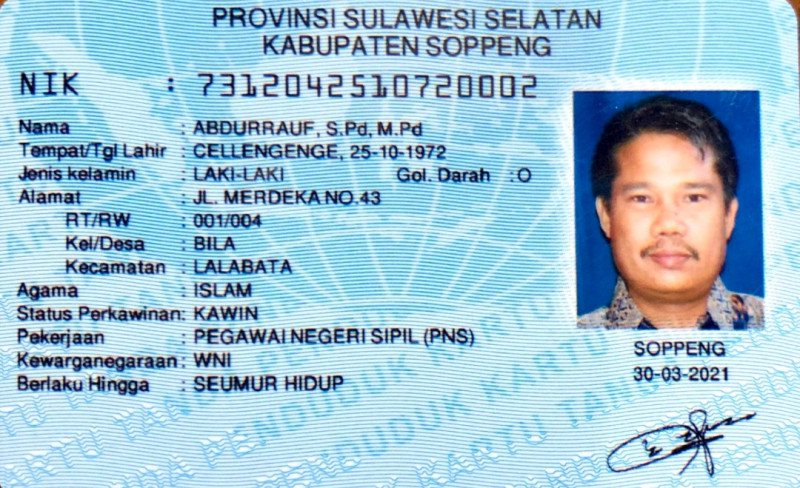

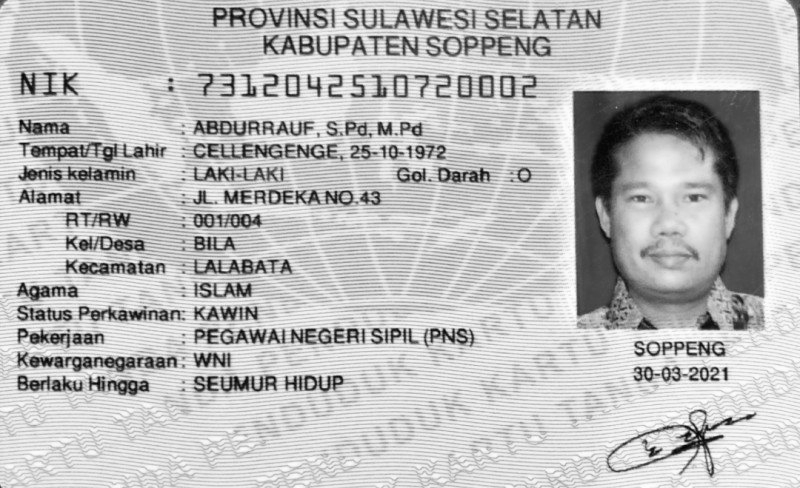

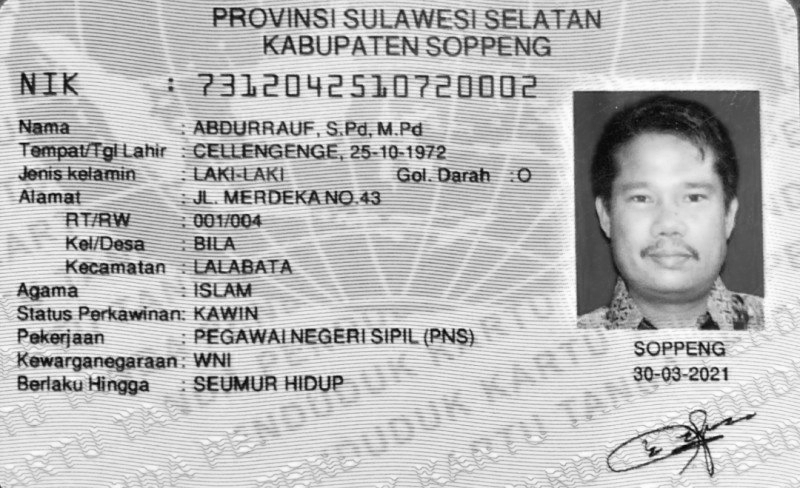

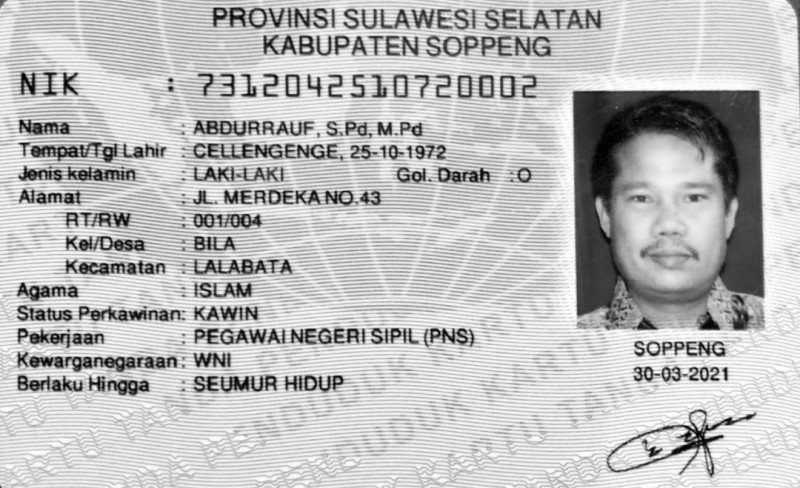

In [80]:
ktp = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg')

# averaging
ktp_avg = np.mean(ktp, axis=2, keepdims=True)

# Lightness
ktp_lightness = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp_lightness.shape[0]):
  for x in range(ktp_lightness.shape[1]):
      ktp_lightness[y, x] = np.mean((ktp[y,x].max(), ktp[y,x].min()))

# Luminance (assuming the input image is in BGR color space)
ktp_luminance = 0.21 * ktp[..., 2] + 0.72 * ktp[..., 1] + 0.07 * ktp[..., 0]

cv2_imshow(ktp)
cv2_imshow(ktp_avg)
cv2_imshow(ktp_lightness)
cv2_imshow(ktp_luminance)

## 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale

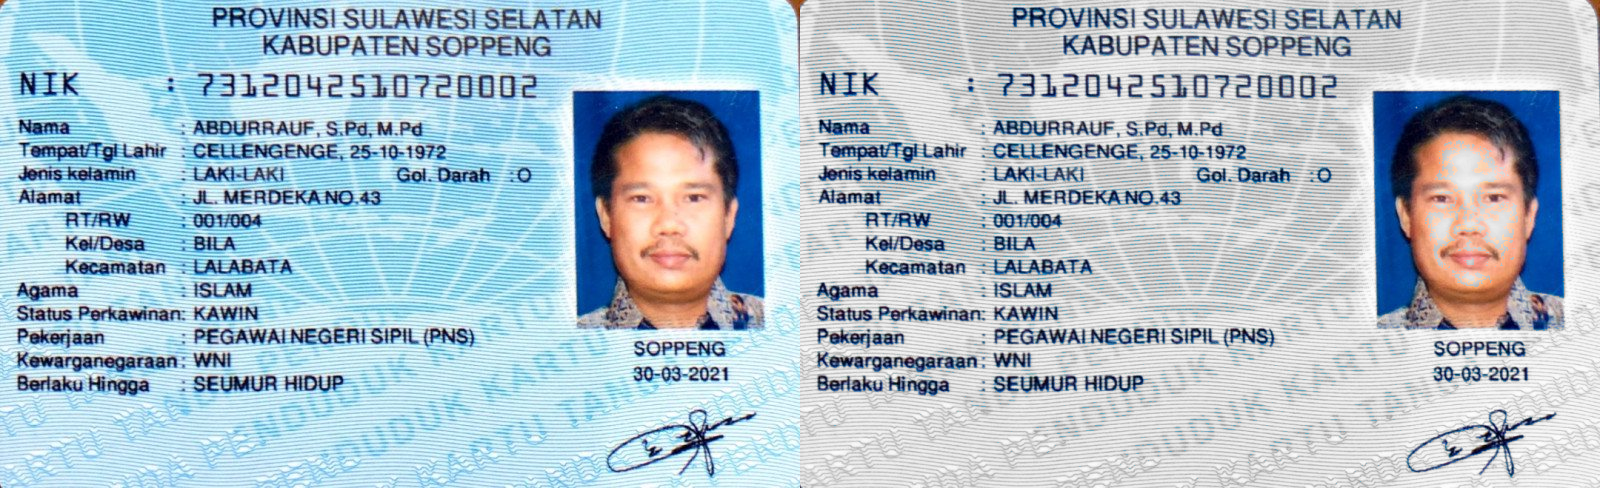

In [77]:
ktp = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg')

ktp2 = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp2.shape[0]):
  for x in range(ktp2.shape[1]):
    for c in range(ktp2.shape[2]):
      b,g,r = ktp[y,x]
      if r < 255 and g < 220 and b < 200:
        ktp2[y,x,c] = ktp[y,x,c]
      else:
        ktp2[y,x,c] = np.mean(ktp[y,x])

cv2_imshow(cv.hconcat((ktp, ktp2)))